<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/11_Hand_written_digits_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Plot ad hoc mnist instances
from keras.datasets import mnist

In [35]:
# data processing and visualization libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
# Keras deep learning model libraries
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization , Conv2D ,MaxPool2D 
from tensorflow.keras.optimizers import SGD ,Adam
# data validation lib
from sklearn.model_selection import KFold



In [36]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

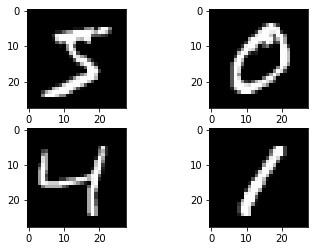

In [7]:
fig , ax =plt.subplots(2,2,figsize=(6,4))
for i in range(4):
  plt.subplot(220 + 1 +i)
  plt.imshow(X_train[i],cmap='gray')

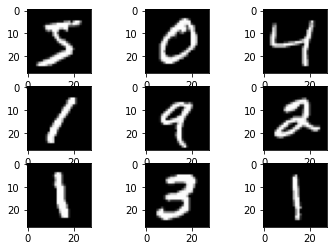

In [8]:
fig =plt.subplots(2,2,figsize=(6,4))
for i in range(9):
  plt.subplot(330 + 1 +i)
  plt.imshow(X_train[i],cmap='gray')

# Data Preprocessing

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [51]:
def data_load_process():
  from keras.datasets import mnist
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  # pre processing for 2D Conv layers [samples][width][height][channel] .Becuase gray channel=1
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
  #  rescaling to change 0-255 pixels to values between 0-1
  X_train=(X_train/255.0).astype('float')
  X_test=(X_test/255.0).astype('float')
  # one hot encoding for the y labels
  y_train= to_categorical(y_train)
  y_test=to_categorical(y_test)
  return X_train, y_train, X_test, y_test

  

In [53]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
X_train, y_train, X_test, y_test=load_dataset()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [52]:
X_train, y_train, X_test, y_test=data_load_process()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# Base Line Model

In [ ]:
# from tensorflow.keras.optimizers import SGD ,Adam

In [155]:
def base_model():
  model = Sequential()
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPool2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPool2D((2, 2)))
  

  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.01)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Training Model and evaluation
# Steps
##1-  Only the training data will be used fpr Cross validation
##2-  Once a better model architecture is selected. The selected
##3-  model will be evaluated on the actual Test data

In [14]:
kfold=KFold(n_splits=3,shuffle=True)
kfold.split(X_train)

<generator object _BaseKFold.split at 0x7fa3866cd7d0>

In [43]:
kfold=KFold(n_splits=3,shuffle=True)
for i,j in kfold.split(X_train):
  print(X_train[i].shape  , X_train[j].shape)

(40000, 28, 28, 1) (20000, 28, 28, 1)
(40000, 28, 28, 1) (20000, 28, 28, 1)
(40000, 28, 28, 1) (20000, 28, 28, 1)


In [175]:
def model_training_evaluation(Xtrain,ytrain,model):
  histories , accuracy = list() , list()
  kfold=KFold(n_splits=6,shuffle=True)
  for train_i , test_i in kfold.split(Xtrain):
    X_train , y_train , X_test , y_test=Xtrain[train_i] , ytrain[train_i] , Xtrain[test_i] , ytrain[test_i]
    history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=6, verbose="auto",validation_data=(X_test , y_test) )
    _, acc=model.evaluate(X_test , y_test)
    print('accuracy={}'.format(acc * 100.0))
    accuracy.append(acc)
    histories.append(history)
  return histories , accuracy

In [ ]:
# # vimportant . The same above function doesnt work if the following parameters are used
# i.e the model_training_evaluation(Xtrain,ytrain,mode)  is replaced by model_training_evaluation(X_train,y_train,model)
# this creates the problem of mismatch of the lenght of data when using for loop
# def model_training_evaluation(X_train,y_train,model):
#   histories , accuracy = list() , list()
#   kfold=KFold(n_splits=3,shuffle=True)
#   for train_i , test_i in kfold.split(X_train):
#     X_train , y_train , X_test , y_test=X_train[train_i] , y_train[train_i] , X_train[test_i] , y_train[test_i]
#     history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=2, verbose="auto",validation_data=(X_test , y_test) )
#     _, acc=model.evaluate(X_test , y_test)
#     print('accuracy={}'.format(acc * 100.0))
#     accuracy.append(acc)
#     histories.append(history)
#   return histories , accuracy

In [176]:
def evaluate_model(Xtrain, ytrain,model ):
  # histories=[]
  # scores=[]
  scores, histories = list(), list()
  
  kfold=KFold(n_splits=3,shuffle=True,random_state=7)
  for train_index , test_index in kfold.split(Xtrain):
    X_train , y_train , X_test , y_test = Xtrain[train_index], ytrain[train_index] , Xtrain[test_index], ytrain[test_index]
    history=model.fit(x=X_train, y= y_train, batch_size=200, epochs=5, verbose='auto', callbacks=None, validation_data=(X_test , y_test))
    _ , acc=model.evaluate(x=X_test,y=y_test)
    print('accuracy={}'.format(acc * 100.0))
    histories.append(history)
    scores.append(acc)
  return histories , scores

# Training run

In [177]:
def training_run():
  X_train, y_train, X_test, y_test=data_load_process()
  model=base_model()
  histories , accuracy=model_training_evaluation(X_train,y_train,model)
  return histories , accuracy


In [178]:
 histories , accuracy=training_run()

Epoch 1/6
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2095 - accuracy: 0.9424 - val_loss: 0.1226 - val_accuracy: 0.9642
Epoch 2/6
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1157 - accuracy: 0.9653 - val_loss: 0.1131 - val_accuracy: 0.9657
Epoch 3/6
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1049 - accuracy: 0.9695 - val_loss: 0.1361 - val_accuracy: 0.9636
Epoch 4/6
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0990 - accuracy: 0.9718 - val_loss: 0.1171 - val_accuracy: 0.9664
Epoch 5/6
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.1328 - val_accuracy: 0.9666
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.1079 - accuracy: 0.9674
accuracy=96.74000144004822
Epoch 1/6
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0928 - accuracy: 0.9739 - val_loss: 0.0791 - val_accuracy: 0.9803
Epoch 2/6


In [179]:
for i in histories:
  print(i.history)

{'loss': [0.20952166616916656, 0.11571227759122849, 0.1049145832657814, 0.0989832729101181, 0.09572886675596237, 0.08839037269353867], 'accuracy': [0.942359983921051, 0.9653199911117554, 0.9695000052452087, 0.9718400239944458, 0.9727200269699097, 0.9738600254058838], 'val_loss': [0.12255379557609558, 0.11313927173614502, 0.13612575829029083, 0.11707975715398788, 0.13280226290225983, 0.10787402093410492], 'val_accuracy': [0.9642000198364258, 0.9656999707221985, 0.9635999798774719, 0.9664000272750854, 0.9666000008583069, 0.9674000144004822]}
{'loss': [0.09280391782522202, 0.08604985475540161, 0.08424027264118195, 0.08770532160997391, 0.08198287338018417, 0.0837114080786705], 'accuracy': [0.9739199876785278, 0.9754599928855896, 0.9758800268173218, 0.9754999876022339, 0.9777200222015381, 0.9773200154304504], 'val_loss': [0.07907511293888092, 0.11913882941007614, 0.22461752593517303, 0.10350915789604187, 0.07748433202505112, 0.08008532971143723], 'val_accuracy': [0.9803000092506409, 0.96590

In [180]:
len(histories)

6

In [181]:
for i in histories:
  print(len(i.history))

4
4
4
4
4
4


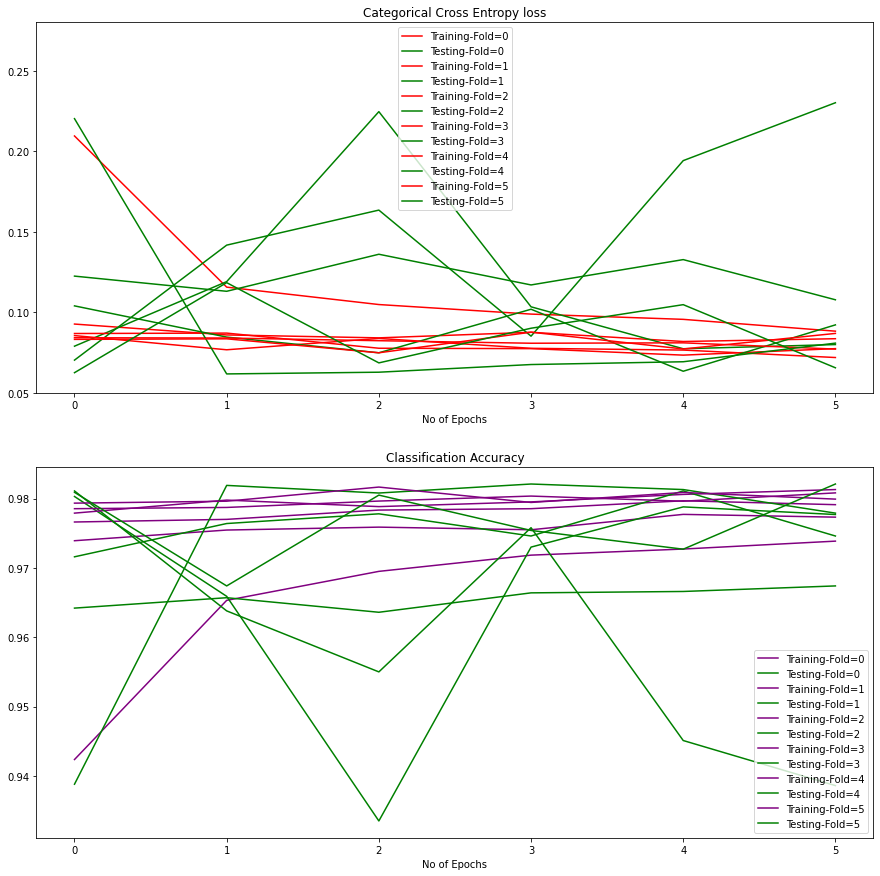

In [192]:
fig ,axx = plt.subplots(2,1, figsize=(15,15))
for i in range(6):
  
  
  axx[0].plot(histories[i].history['loss']  ,label='Training-Fold='+str(i) ,color='r')
  axx[0].plot(histories[i].history['val_loss'] , label='Testing-Fold='+str(i) ,color='green')
  axx[0].legend()
  axx[0].set_title('Categorical Cross Entropy loss')
  axx[0].set_xlabel('No of Epochs')
  axx[0].set_ylim(0.05, 0.28)
  
  axx[1].plot(histories[i].history['accuracy']  ,label='Training-Fold='+str(i), color='purple')
  axx[1].plot(histories[i].history['val_accuracy'], label='Testing-Fold='+str(i) ,color='green')
  axx[1].legend()
  axx[1].set_title('Classification Accuracy')
  axx[1].set_xlabel('No of Epochs')
  
plt.show()


In [87]:
#save history in pandas
histories_df=pd.DataFrame(histories)
pd.DataFrame.from_dict(histories)

,0
0,<keras.callbacks.History object at 0x7fa33b8f0...
1,<keras.callbacks.History object at 0x7fa33dde8...
2,<keras.callbacks.History object at 0x7fa38013b...
3,<keras.callbacks.History object at 0x7fa380012...
4,<keras.callbacks.History object at 0x7fa380110...


In [ ]:
def evaluate_model(Xtrain, ytrain,model ):
  # histories=[]
  # scores=[]
  scores, histories = list(), list()
  
  kfold=KFold(n_splits=3,shuffle=True,random_state=7)
  for train_index , test_index in kfold.split(Xtrain):
    X_train , y_train , X_test , y_test = Xtrain[train_index], ytrain[train_index] , Xtrain[test_index], ytrain[test_index]
    history=model.fit(x=X_train, y= y_train, batch_size=200, epochs=3, verbose='auto', callbacks=None, validation_data=(X_test , y_test))
    _ , acc=model.evaluate(x=X_test,y=y_test)
    print('accuracy={}'.format(acc * 100.0))
    histories.append(history)
    scores.append(acc)
  return histories , scores


# Running/Evaluating on Train Data

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
  trainX, trainY, testX, testY = data_processing()
  model=base_line_model()
  scores , histories = evaluate_model(trainX, trainY,model)
  return histories , scores

In [ ]:
 # entry point, run the test harness
scc , histt=run_test_harness()

In [ ]:
for i in histt:
  print(i.history)

# Summarizing Results

In [ ]:
def summarize_diagnostics(histories):
  ax,fig = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
  for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show() #working
 

In [ ]:
summarize_diagnostics(histt)

# **Summarize Model efficiency**

In [ ]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [ ]:
summarize_performance(scc)

# **Saving the Final Model**
# Steps
 

1.   **Using different model architecture are used and Kfold cross validation is done**
2.   **Best model architecture is found (in order to save time..this step is skipped in the notebook)**
2.   **The final chosen architecutr of model is trained on the Full data (without using Kfold cross validation)**


In [ ]:
# we skip Step1 and step2 and jumpt to step 3 here to save time
# fit model

X_train, y_train, X_test, y_test = data_processing()
model=base_line_model()

In [ ]:
# fit model
history=model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)

# **Saving Model & Training History(with acc & loss data )**

In [ ]:
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)

# saving model history 

import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# **Using Model Evalutation (only) on the Test Data**
## This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [ ]:
# run the test harness for evaluating a model
# the only difference here is that we just load the previous model
def run_test_harness():
  trainX, trainY, testX, testY = data_processing()
  from keras.models import load_model
  model_path=path +'/digits_model1.h5'
  loaded_model = load_model(model_path) 
  model=loaded_model
  # we just use simple'evaluate" method on test data(not the function 'model_evaluate')
  loss, acc = model.evaluate(testX, testY)
  print('Final modal accuracy={} loss={}'.format(acc*100, loss))
  return histories , scores
histories , scores=run_test_harness()

In [ ]:
# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Make prediction

## 1- Take few images
Taking 6 images from the test data 

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure(figsize=(8,8))
for i in range(6):
	# define subplot
	plt.subplot(320 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 2-Load the save model

In [ ]:
from keras.models import load_model 
model_path=path +'/digits_model1.h5'
loaded_model = load_model(model_path) 

# Predict on the first 5 test images.
predictions = loaded_model.predict(X_test[:6])
# Print our model's predictions.
import numpy as np
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4,1]


In [ ]:
# Check our predictions against the ground truths.
print(np.argmax(y_test[:6],axis=1)) # [7, 2, 1, 0, 4]

# **Loading History of Accuracy and Losses of the Model**

In [ ]:
history_path=path +'/history_digits_model1.json'
history= json.load(open(history_path, 'r'))

### The loaded history is in String format.Converting it back to dictionary

In [ ]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

In [ ]:
### .
acc = history_1['accuracy']
#acc=np.array(acc)

#val_acc=np.array(val_acc)
loss = history_1['loss']

epochs = range(1, len(acc) + 1)
acc=np.array(acc)

plt.plot(epochs, np.array(acc), 'r', label='Training acc')

plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training  loss')
plt.legend()
plt.show()